In [49]:
#GET and Organize data for model training

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


#reads data into 'data'
data = pd.read_csv('BTC-USD_train.csv', date_parser = True)
data = data.dropna()
data.tail()

#cut off the last bit of data
days = 120  #adjust this number up to get a biggest test data set :)
data_training = data[:len(data)-days]
data_test = data


#remove the date column, get data with and without sentiment data
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()


#normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

#get the shape of the data, 
X_train = [] 
Y_train = []

for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])
    
    
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(1643, 60, 8)

Epoch 1/10
30/30 [==============================] - 3s 56ms/step - loss: 0.0152 - val_loss: 0.0011
Epoch 2/10
30/30 [==============================] - 1s 34ms/step - loss: 7.2528e-04 - val_loss: 9.3733e-04
Epoch 3/10
30/30 [==============================] - 1s 30ms/step - loss: 5.2694e-04 - val_loss: 6.4798e-04
Epoch 4/10
30/30 [==============================] - 1s 32ms/step - loss: 4.9469e-04 - val_loss: 7.4195e-04
Epoch 5/10
30/30 [==============================] - 1s 31ms/step - loss: 4.2660e-04 - val_loss: 6.1551e-04
Epoch 6/10
30/30 [==============================] - 1s 25ms/step - loss: 3.9096e-04 - val_loss: 0.0013
Epoch 7/10
30/30 [==============================] - 1s 26ms/step - loss: 4.6753e-04 - val_loss: 8.0288e-04
Epoch 8/10
30/30 [==============================] - 1s 27ms/step - loss: 3.5745e-04 - val_loss: 8.2354e-04
Epoch 9/10
30/30 [==============================] - 1s 26ms/step - loss: 3.4448e-04 - val_loss: 7.1045e-04
Epoch 10/10
30/30 [==============================

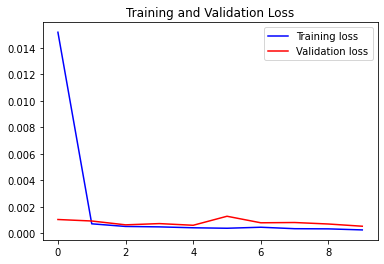

In [50]:
#Simple RNN training

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.linear_model import LinearRegression
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

SimpleRNNmodel = Sequential()

SimpleRNNmodel.add(layers.SimpleRNN(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 8)))
SimpleRNNmodel.add(layers.SimpleRNN(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 8)))
SimpleRNNmodel.add(layers.SimpleRNN(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 8)))
SimpleRNNmodel.add(layers.SimpleRNN(units = 50, activation = 'relu'))


SimpleRNNmodel.add(layers.Dense(1))





SimpleRNNmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')

history= SimpleRNNmodel.fit(X_train, Y_train, epochs = 10, batch_size =50, validation_split=0.1)

SimpleRNNmodel.summary()



#plotting validation
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 60, 50)            11800     
_________________________________________________________________
dropout_24 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_25 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_26 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 80)              

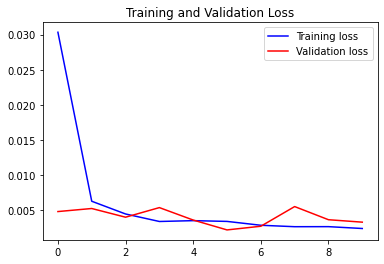

In [56]:
#LSTM RNN

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.linear_model import LinearRegression

LSTMmodel = Sequential()

LSTMmodel.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 8)))
LSTMmodel.add(Dropout(0.2))
LSTMmodel.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
LSTMmodel.add(Dropout(0.2))
LSTMmodel.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
LSTMmodel.add(Dropout(0.2))
LSTMmodel.add(LSTM(units = 80, activation = 'relu'))
LSTMmodel.add(Dropout(0.2))
LSTMmodel.add(Dense(units =1))

LSTMmodel.summary()

LSTMmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')

history= LSTMmodel.fit(X_train, Y_train, epochs = 10, batch_size =50, validation_split=0.1)


#plotting validation
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


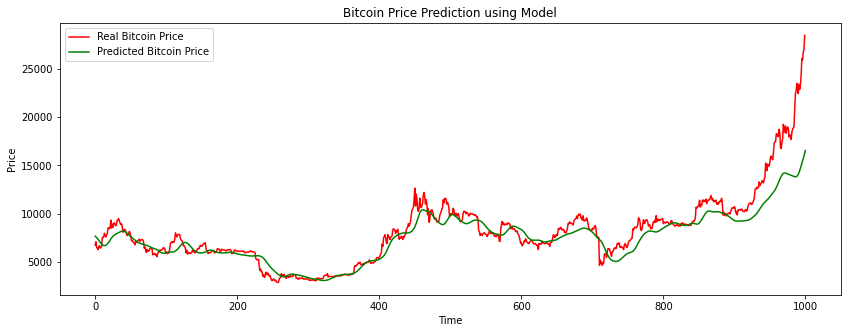

In [57]:
#Getting prediction based on test data
part_60_days = data_training.tail(days)
df = part_60_days.append(data_test, ignore_index = True)
df = df.dropna()
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

inputs = scaler.transform(df)
inputs

X_test = []
Y_test = []

for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

#*************#
Y_pred = LSTMmodel.predict(X_test)  #Change this to "Y_pred = SimpleRNNmodel.predict(X_test)" for simple RNN results
#*************#

Y_pred, Y_test
    
scaler.scale_
scale = 1/scaler.scale_[0]

Y_test = Y_test*scale
Y_pred = Y_pred*scale

#graphing test data

plt.figure(figsize=(14,5))
plt.plot(Y_test[-days:], color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred[-(days+1):], color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

The model predicted the direction of daily price movement with a probability of:  0.5165165165165165
If you predicted one way price direction every day, you would be right:  0.5325325325325325
STDD:  [4860.684]
Start Value: 1 BTC or $ 6737.186767999999  End Value:  0.7849625838880517  BTC or $ 22352.987978527417


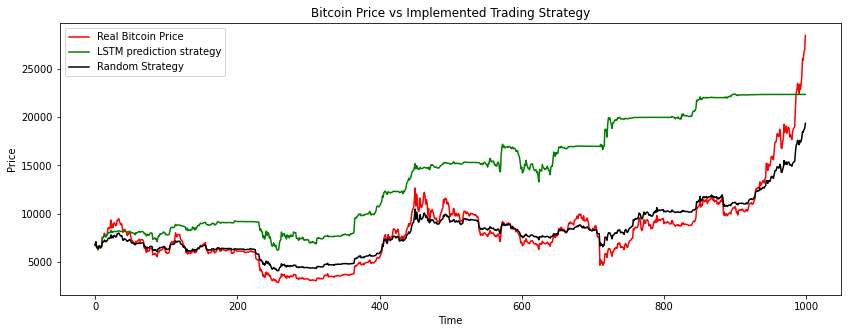

In [58]:
import random

neg = 0
pos = 0

test = 0

days =1000  #adjust this parameter and see changes in graph.... technically should match test data size...


#calculate probability of correctly guessing price-movement direction. C-value
for i in range (0, days-1):
    actual = Y_test[len(Y_test)-days+i] - Y_test[len(Y_test)-(days-1)+i]  #actual price day1 - actual price day2 = movement
    predi = Y_test[len(Y_test)-days+i] - Y_pred[len(Y_test)-days+i] #actual price day1 - predicted price day2 = movement
    if (predi < 0 and actual < 0) or (predi > 0 and actual > 0):
        pos += 1

    else:
        neg += 1
        
    if actual < 0:
        test +=1
        
result = (pos/(neg+pos))

baseline = test/(neg+pos)


print("The model predicted the direction of daily price movement with a probability of: ", result)
print("If you predicted one way price direction every day, you would be right: ", baseline)




#standard deviation:
error = 0
for i in range(0, days-1):
    error += (Y_test[len(Y_test)-days+i] - Y_pred[len(Y_test)-(days+1)+i])**2
    
stdd = (error/120)**.5    

print("STDD: ", stdd)

###################################################### Implementing trading strat. using model. The results vary
#substantially from training to training.




#daily trading using price movement prediction
btc = 1

start_price = Y_test[len(Y_test)-(days)]
usd = 0

btc1 = 1
usd1 = 0

a = 0.1 # 10% amount of total stack that trades every day, adjust this and see changes in graph below

b = False

value = []
testv = []


for i in range (0, days):
    predi = Y_test[len(Y_test)-days+i] - Y_pred[len(Y_test)-days+i]
    
    t_f = bool(random.getrandbits(1))
    
    if (predi < 0):
        buy = Y_test[len(Y_test)-days+i]
        btc += (usd/buy)*a
        usd -= usd*a
        
    else:
        sell = Y_test[len(Y_test)-days+i]
        usd += sell*btc*a
        btc -= a*btc
    
    if t_f == True:
        buy = Y_test[len(Y_test)-days+i]
        btc1 += (usd1/buy)*a
        usd1 -= usd1*a
        
    else:
        sell = Y_test[len(Y_test)-days+i]
        usd1 += sell*btc1*a
        btc1 -= a*btc1
        

    value.append(usd+((Y_test[len(Y_test)-(days)+i])*btc))
    testv.append(usd1+((Y_test[len(Y_test)-(days)+i])*btc1))
    


            
            
            
total = usd + (btc*Y_test[len(Y_test)-1])

print("Start Value: 1 BTC or $", Y_test[len(Y_test)-days]," End Value: ", btc + usd/Y_test[len(Y_test)-1], " BTC or $", usd+btc*Y_test[len(Y_test)-1])

plt.figure(figsize=(14,5))
plt.plot(Y_test[-days:], color = 'red', label = 'Real Bitcoin Price')
plt.plot(value, color = 'green', label = 'LSTM prediction strategy')
plt.plot(testv, color = 'black', label = 'Random Strategy')
plt.title('Bitcoin Price vs Implemented Trading Strategy')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



[]

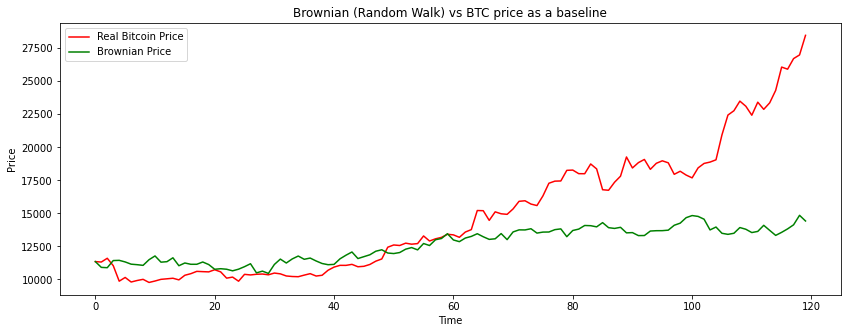

In [55]:
#Brownian prediction. Not the same as random trading above because brownian, once deviated from price, will generally
#always be either below or above the actual price. This means it will always be sending the same signal (buy or sell),
#not a mix of both....

mu = 0
sigma = 300

s = np.random.normal(mu, sigma, 120)

final120 = Y_test[-120:]

brownian = []

brownian.append(Y_test[(len(Y_test))-120])

for i in range (1, 120):
    brownian.append(brownian[i-1]+s[i])

plt.figure(figsize=(14,5))
plt.plot(Y_test[-120:], color = 'red', label = 'Real Bitcoin Price')
plt.plot(brownian, color = 'green', label = 'Brownian Price')
plt.title('Brownian (Random Walk) vs BTC price as a baseline')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.plot()

In [59]:
#The following code is the manual linear regression model. Thank you David

#GET and Organize data for model training LSTM

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle


In [60]:
TRAIN_DAYS = 60
NUM_COLUMN = 8
W_STEP = 0.5

In [61]:
# e.g. x = X_train[0], w = w0
def get_y(x, w):
    y = 0
    for i in range(0, len(x)):
        for j in range(0, len(x[0])):
            y += x[i][j] * w[i*len(x[0])+j]
    return y

# e.g. x = X_train, y = Y_train, w = w0
def get_E_w(x, y, w):
    E_w = 0
    for i in range(0, len(x)):
        E_w += (y[i] - get_y(x[i], w))**2
    return E_w + (np.array(w) @ np.array(w))/2

# e.g. x = X_train, w = w0
def my_predict(x, w):
    y = []
    for i in range(0, len(x)):
        x0 = []
        for j in range(0, len(x[0])):
            for k in range(0, len(x[0][0])):
                x0.append(x[i][j][k])
        y.append(np.array(x0) @ np.array(w0))
    return y

In [62]:
#reads data into 'data'
df_train = pd.read_csv('BTC-USD_train.csv', date_parser = True)
df_train = df_train.dropna()
nda_train = df_train.drop(['Date', 'Adj Close'], axis = 1)

#normalize the data
scaler = StandardScaler()
scaler = MinMaxScaler() # scales too much
nda_train = scaler.fit_transform(nda_train)
# nda_train = np.array(nda_train)

#get the shape of the data, 
X_train = [] 
Y_train = []

n_train = nda_train.shape[0]

for i in range(TRAIN_DAYS, n_train):
    X_train.append(nda_train[i-TRAIN_DAYS:i])
    Y_train.append(nda_train[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

# estimate weight vector w0 so that all weights are equal in value
# fit to the first data point
w00 = Y_train[0]/sum(sum(X_train[0])) # y divided by the sum of all features -> assign to w00
w0 = []
for i in range(0, len(X_train[0])):
    for j in range(0, len(X_train[0][0])):
        w0.append(w00)

In [63]:
# load w0 from file system
# do it if it exists and you wish not to recalculate it

f = open("w0.pkl",'rb')
w0 = pickle.load(f)
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'w0.pkl'

In [ ]:
# if w0 is imported in the cell above
# this cell is not needed

exit_flag = True
no_improvement_count = 0

while(exit_flag):
    # get default E_w
    E_w = get_E_w(X_train, Y_train, w0)
    
    for i in range(0, len(w0)):
        w1 = w0.copy()
        w1[i] *= (1-W_STEP) # change i-th weight
        E_w1 = get_E_w(X_train, Y_train, w1) # calculate changed E_w
        # if new E_w is better than old E_w
        if(E_w1 < E_w):
            # uncomment if you wish to see progress
#             print('made improvement, i = ' + str(i))
#             print('going down')
#             print(E_w, E_w1)
#             print('')
            E_w = E_w1
            w0 = w1
            no_improvement_count = 0
            continue
        else:
            no_improvement_count += 1
        
        w2 = w0.copy()
        w2[i] *= (1+W_STEP)
        E_w2 = get_E_w(X_train, Y_train, w2)
        if(E_w2 < E_w):
            # uncomment if you wish to see progress
#             print('made improvement, i = ' + str(i))
#             print('going up')
#             print(E_w, E_w2)
#             print('')
            E_w = E_w2
            w0 = w2
            no_improvement_count = 0
            continue
        else:
            no_improvement_count += 1
            
        # if no improvements are made for the duration of the weight vector
        # up or down
        # then exit loop
        # the chance is you will want to manually halt the loop
        if(no_improvement_count > 2*len(w0)):
            exit_flag = False

In [ ]:
# save weight vector w0 to file system

f = open("w0.pkl",'wb')
pickle.dump(w0 ,f)
f.close()

In [ ]:
Y_train_pred = my_predict(X_train, w0)
    
plt.figure(figsize=(14,5))
plt.plot(Y_train, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_train_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using Lin.Reg., with Google Trends Sentiment Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# graphing the prediction vs actual
df_part_60_days = df_train.tail(60)
df_test = pd.read_csv('BTC-USD_test.csv', date_parser = True)
df_test = df_part_60_days.append(df_test, ignore_index = True)
df_test = df_test.drop(['Date', 'Adj Close'], axis = 1)
# df.head()

nda_test = scaler.transform(df_test)

X_test = []
Y_test = []

for i in range (TRAIN_DAYS, nda_test.shape[0]):
    X_test.append(nda_test[i-TRAIN_DAYS:i]) 
    Y_test.append(nda_test[i,0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
# X_test.shape, Y_test.shape
Y_test_pred = my_predict(X_test, w0)

plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_test_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using Lin.Reg, with Google Trends Sentiment Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()